## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_17-27-04-23.csv', firstRow=306, lastRow=312)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_170423_S307-312.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=82s and ended at t=494s; mass=43.7862g
This equals a volume of 43.874m; expected was 44.31mL; error is 0.984%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00041666666666666675 g/s^2


<IPython.core.display.Javascript object>


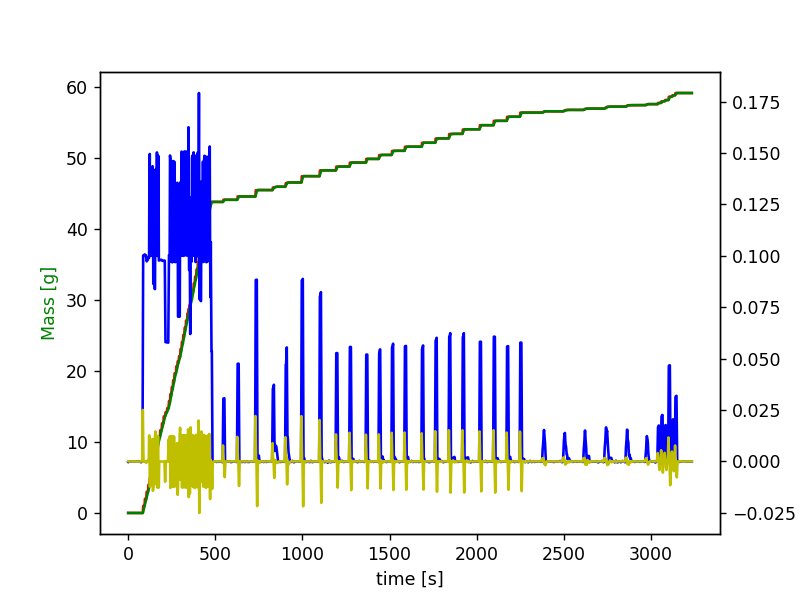

Addition of 0.304g Texapon SB 3 KC detected from 540s to 560s - expected volume = 0.578mL and actual volume = 0.271mL (resulting error is 53.086%)
Addition of 0.473g Texapon SB 3 KC detected from 622s to 642s - expected volume = 0.578mL and actual volume = 0.421mL (resulting error is 27.083%)
Addition of 0.91g Plantapon ACG 50 detected from 726s to 756s - expected volume = 0.877mL and actual volume = 0.801mL (resulting error is 8.594%)
Addition of 0.479g Plantapon LC 7 detected from 824s to 862s - expected volume = 0.561mL and actual volume = 0.452mL (resulting error is 19.394%)
Addition of 0.597g Plantapon LC 7 detected from 898s to 930s - expected volume = 0.561mL and actual volume = 0.563mL (resulting error is 0.455%)
Addition of 0.894g Dehyton MC detected from 990s to 1016s - expected volume = 0.871mL and actual volume = 0.824mL (resulting error is 5.476%)
Addition of 0.821g Dehyton PK 45 detected from 1094s to 1116s - expected volume = 0.808mL and actual volume = 0.777mL (resultin

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00041666666666666675 g/s^2


<IPython.core.display.Javascript object>


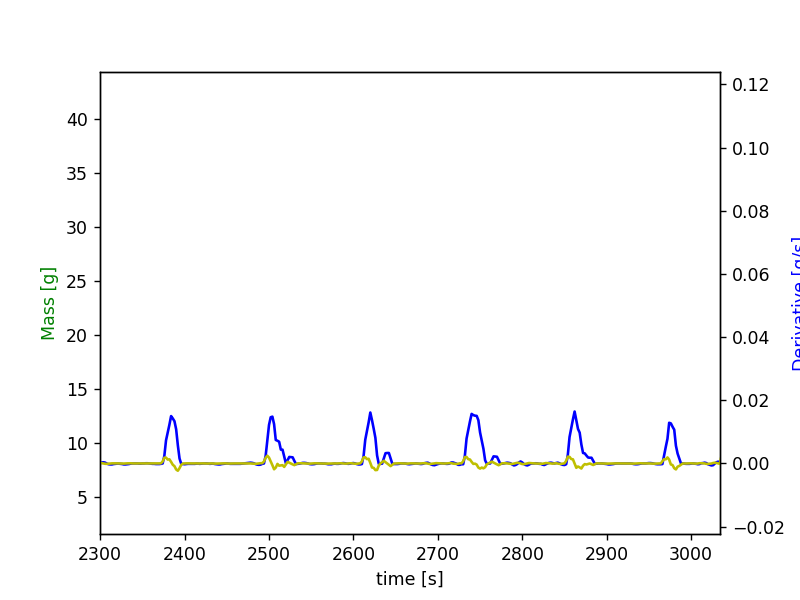

Addition of 0.183g Dehyquart CC7 Benz detected from 2372s to 2400s - expected volume = 0.205mL and actual volume = 0.181mL (resulting error is 11.959%)
Addition of 0.206g Dehyquart CC7 Benz detected from 2492s to 2534s - expected volume = 0.191mL and actual volume = 0.203mL (resulting error is 5.833%)
Addition of 0.192g Dehyquart CC7 Benz detected from 2608s to 2650s - expected volume = 0.18mL and actual volume = 0.19mL (resulting error is 5.563%)
Addition of 0.278g Dehyquart CC7 Benz detected from 2728s to 2776s - expected volume = 0.264mL and actual volume = 0.274mL (resulting error is 3.778%)
Addition of 0.214g Dehyquart CC7 Benz detected from 2850s to 2888s - expected volume = 0.201mL and actual volume = 0.21mL (resulting error is 4.451%)
Addition of 0.146g Dehyquart CC7 Benz detected from 2964s to 2990s - expected volume = 0.15mL and actual volume = 0.142mL (resulting error is 5.645%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.00125 g/s^2


<IPython.core.display.Javascript object>


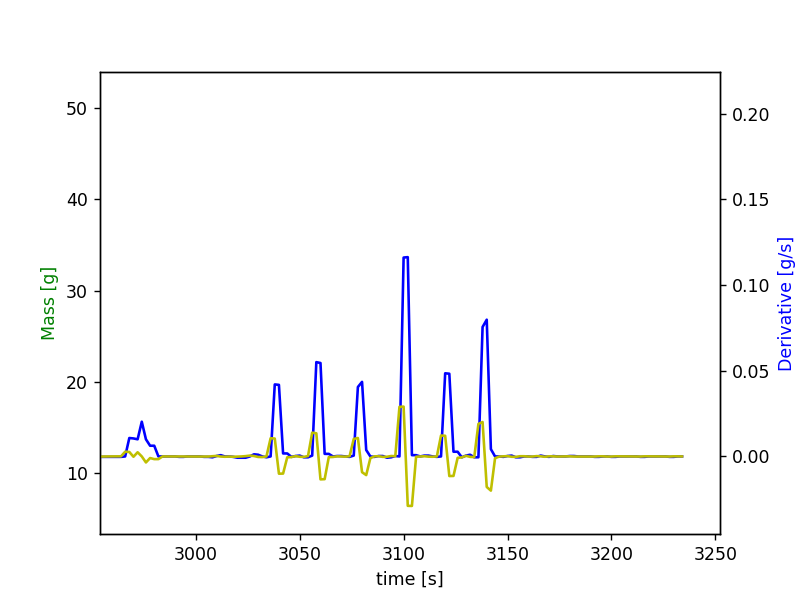

Addition of 0.173g Arlypon F detected from 3034s to 3046s - expected volume = 0.194mL and actual volume = 0.197mL (resulting error is 1.765%)
Addition of 0.224g Arlypon F detected from 3054s to 3066s - expected volume = 0.238mL and actual volume = 0.254mL (resulting error is 6.667%)
Addition of 0.175g Arlypon F detected from 3074s to 3086s - expected volume = 0.179mL and actual volume = 0.2mL (resulting error is 11.783%)
Addition of 0.467g Arlypon F detected from 3096s to 3108s - expected volume = 0.512mL and actual volume = 0.532mL (resulting error is 3.778%)
Addition of 0.203g Arlypon F detected from 3116s to 3128s - expected volume = 0.207mL and actual volume = 0.23mL (resulting error is 10.929%)
Addition of 0.319g Arlypon F detected from 3134s to 3146s - expected volume = 0.339mL and actual volume = 0.357mL (resulting error is 5.281%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_170423_S307-S312.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_18820\2855019688.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
306,307.0,0.000000,0.000000,0.000000,0.0,0.0,8.900997,0.000000,0.0,0.000000,10.753464,0.000000,0.000000,0.0,0.0,1.822853,0.0,1.722067,0.0
307,308.0,8.113164,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,12.557903,0.0,0.0,2.156284,0.0,2.340436,0.0
308,309.0,0.000000,0.000000,10.683821,0.0,0.0,0.000000,0.000000,0.0,0.000000,11.584818,0.000000,0.000000,0.0,0.0,1.908535,0.0,1.743385,0.0
309,310.0,0.000000,9.060134,0.000000,0.0,0.0,0.000000,0.000000,0.0,10.993772,0.000000,0.000000,0.000000,0.0,0.0,2.767849,0.0,4.647499,0.0
310,311.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,8.163623,0.0,0.000000,0.000000,11.627821,0.000000,0.0,0.0,2.127859,0.0,2.017304,0.0
311,312.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,12.797583,11.639237,0.0,0.0,1.456648,0.0,3.177235,0.0
